In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import collections
import datetime
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)
np.set_printoptions(threshold=sys.maxsize)

In [2]:
path='/content/drive/MyDrive/PA_DATA/BSE_&_NSE_Stocks_Trading_Data_20_years.txt'
file1=pd.read_csv(path,sep="|")
file1['co_stkdate'] = pd.to_datetime(file1.co_stkdate)

In [3]:
start_date='2010-03-31'
end_date='2020-09-30'
#start_date='2017-01-01'
#end_date='2017-12-30'
df=file1.loc[file1['company_name'] == 'RELIANCE INDUSTRIES LTD.']
df=df.sort_values(by=['co_stkdate'])
#mask = (df['co_stkdate'] > start_date) & (df['co_stkdate'] <= end_date)
#df=df[mask]

In [4]:
df['Percentage Return'] = df['nse_closing_price'].pct_change()
df.tail(10)

,co_code,company_name,co_stkdate,nse_opening_price,nse_high_price,nse_low_price,nse_closing_price,nse_returns,nse_traded_qty,nse_no_of_trans,nse_avg_rate,nse_pe,nse_pb,nse_bv_per_share,equity_shares_on_stkdate,equity_facevalue_on_stkdate,eps_on_stkdate,cons_eps_on_stkdate,ceps_on_stkdate,cons_ceps_on_stkdate,equity_bv_on_stkdate,Percentage Return
209280,196667,RELIANCE INDUSTRIES LTD.,2020-11-03,1108.00,1178.45,1108.00,1153.55,1.0354,27237627.0,490124.0,1157.92,19.8089,1.6863,684.0589,6.339268e+09,10.0,58.2339,68.8218,73.4375,84.0255,4336432.6,-0.205954
209318,196667,RELIANCE INDUSTRIES LTD.,2020-11-05,1580.00,1615.00,1572.30,1576.80,1.0096,30670404.0,576001.0,1592.89,28.2819,2.3543,669.7529,6.339403e+09,10.0,55.7529,69.4939,71.2291,84.9701,4245834.0,0.366911
209340,196667,RELIANCE INDUSTRIES LTD.,2020-11-06,1566.00,1567.95,1531.00,1537.70,0.9781,9408283.0,269490.0,1546.33,29.4185,2.1767,706.4407,6.761844e+09,10.0,52.2698,65.1523,66.7791,79.6617,4776841.4,-0.024797
209383,196667,RELIANCE INDUSTRIES LTD.,2020-11-08,2134.80,2160.00,2100.35,2133.80,1.0066,21611359.0,491594.0,2133.30,45.6017,2.9600,720.8789,6.762031e+09,10.0,46.7922,62.4339,61.2996,76.9414,4874606.0,0.387657
209406,196667,RELIANCE INDUSTRIES LTD.,2020-11-09,2312.00,2337.85,2287.10,2319.75,1.0025,27445883.0,599768.0,2318.58,49.5757,3.2179,720.8783,6.762038e+09,10.0,46.7921,62.4338,61.2996,76.9413,4874606.1,0.087145
209262,196667,RELIANCE INDUSTRIES LTD.,2020-12-02,1456.15,1474.85,1455.00,1470.30,1.0121,6187091.0,192511.0,1465.86,25.2481,2.1494,684.0622,6.339236e+09,10.0,58.2341,68.8222,73.4379,84.0259,4336432.3,-0.366182
209281,196667,RELIANCE INDUSTRIES LTD.,2020-12-03,1085.00,1101.00,1048.70,1063.00,0.9215,25588170.0,646095.0,1076.20,18.2540,1.5540,684.0589,6.339268e+09,10.0,58.2339,68.8218,73.4375,84.0255,4336432.6,-0.277018
209319,196667,RELIANCE INDUSTRIES LTD.,2020-12-05,1564.80,1568.35,1465.00,1479.25,0.9381,46029119.0,807575.0,1511.39,26.5323,2.2087,669.7529,6.339403e+09,10.0,55.7529,69.4939,71.2291,84.9701,4245834.0,0.391580
209341,196667,RELIANCE INDUSTRIES LTD.,2020-12-06,1500.00,1593.00,1497.00,1588.80,1.0332,17790565.0,337575.0,1552.68,30.3962,2.2490,706.4407,6.761844e+09,10.0,52.2698,65.1523,66.7791,79.6617,4776841.4,0.074058
209384,196667,RELIANCE INDUSTRIES LTD.,2020-12-08,2121.00,2145.00,2106.80,2127.60,0.9971,13967529.0,308155.0,2129.79,45.4692,2.9514,720.8789,6.762031e+09,10.0,46.7922,62.4339,61.2996,76.9414,4874606.0,0.339124


In [5]:
df['nse_traded_qty']=df['nse_traded_qty']/10000
df['equity_bv_on_stkdate']=df['equity_bv_on_stkdate']/1000000
df['equity_shares_on_stkdate']=df['equity_shares_on_stkdate']/1000000000
df['nse_no_of_trans']=df['nse_no_of_trans']/10000

In [6]:
df.reset_index(drop=True, inplace=True)
df['Lag1']=np.nan
df['Lag2']=np.nan

In [7]:
for i in range (2,2607):
    df.loc[i,'Lag1']=df.loc[i-1,'Percentage Return']
    df.loc[i,'Lag2']=df.loc[i-2,'Percentage Return']
    df.loc[i,'nse_traded_qty_lag']=df.loc[i-1,'nse_traded_qty']

In [ ]:
df = df.dropna()
df['Direction']=np.nan
df.tail(5)

In [9]:
#Assigning values to Direction
def def_direction(cols):
    Direction = cols[0]
    PercentageReturn = cols[1]
    if PercentageReturn > 0:
        return 1
    else:
        return 0

In [10]:
df['Direction'] = df[['Direction','Percentage Return']].apply(def_direction,axis=1)

(array([1270.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1334.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

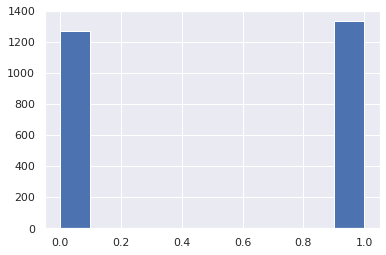

In [44]:
plt.hist(df['Direction'] )

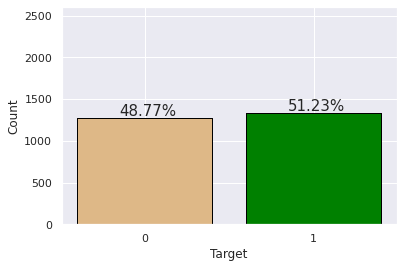

In [45]:
def bar_plot(df, target):
    unique, counts = np.unique(target, return_counts = True)
    label = np.zeros(len(unique))
    for i in range(len(unique)):
        label[i] = (counts[i]/df.shape[0])*100
        plt.bar(unique,counts, color = ['burlywood', 'green'], edgecolor='black')
        plt.text(x = unique[i]-0.15, y = counts[i]+0.01*df.shape[0], s = str("%.2f%%" % label[i]), size = 15)
    plt.ylim(0, df.shape[0])
    plt.xticks(unique)
    plt.xlabel("Target")
    plt.ylabel("Count")
    plt.show()
    return unique, counts

##Visualise Class Imbalance - Training Set
num_classes, feat_per_class = bar_plot(df, df['Direction'] )

In [12]:
def feat_corr_analysis(corrmat):
    f, ax = plt.subplots(figsize =(9, 8)) 
    #1 Heatmap
    sns.heatmap(corrmat, vmin=0, vmax=1, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
    plt.title("Heatmap - Correlation between data variables")
    
    #2 Correlation Values and Features
    correlations = corrmat.abs().unstack().sort_values(kind="quicksort").reset_index()
    correlations = correlations[correlations['level_0'] != correlations['level_1']]
    Clos_dir_corr = corrmat['Direction']
    Clos_dir_corr = df_temp_corr['Direction'].drop(['Direction'], axis =0)
    Clos_dir_corr = Clos_dir_corr.sort_values(ascending = False)  
    
    #Plot with different colours for better visualisation
    clist = [(0, "red"), (0.125, "orange"), (0.25, "green"), (0.5, "blue"), 
             (0.7, "green"), (0.75, "orange"), (1, "red")]
    rvb = mcolors.LinearSegmentedColormap.from_list("", clist)    
    N = Clos_dir_corr.shape[0]
    Col_range = np.arange(N).astype(float)
    #Create Bar Plot
    plt.figure(figsize=(15,10))
    plt.bar(Clos_dir_corr.index, Clos_dir_corr[:],color=rvb(Col_range/N))
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.xticks(fontsize=8,rotation=90)
    plt.title('Feature Correlation for Closing Direction')
    plt.show()
    return 

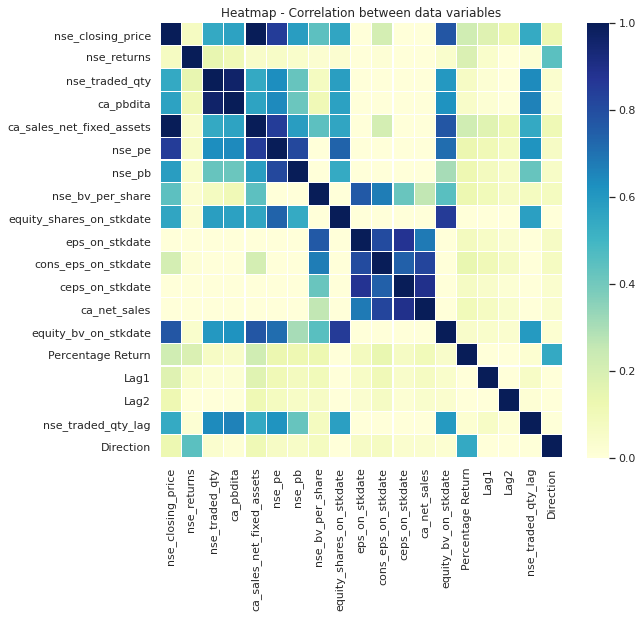

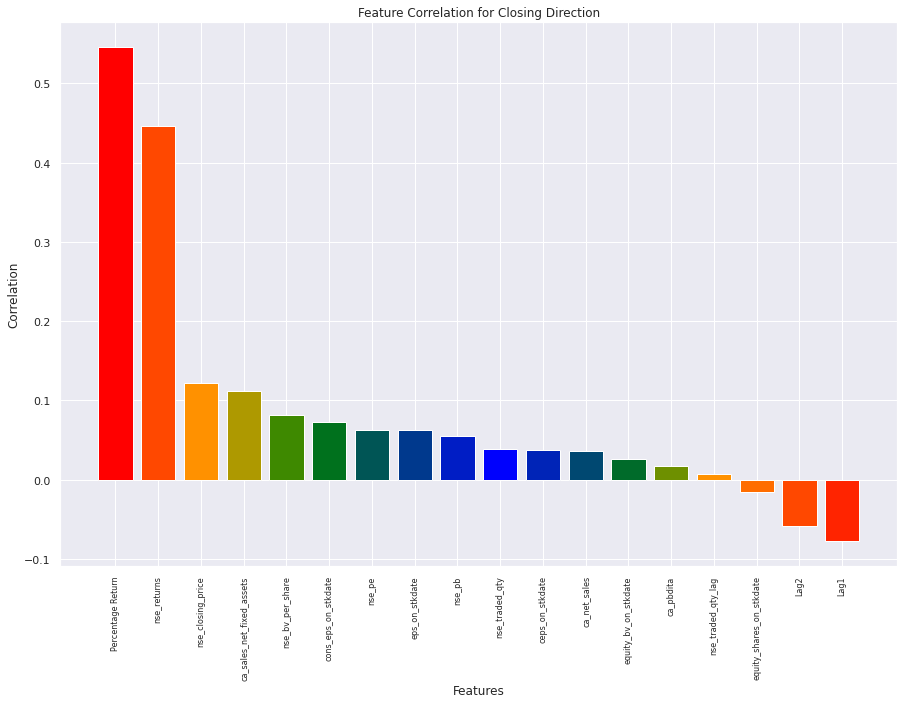

In [13]:
df_temp =df
df_temp = df_temp.rename({'nse_no_of_trans': 'ca_pbdita', 'nse_avg_rate': 'ca_sales_net_fixed_assets',
                          'cons_ceps_on_stkdate' : 'ca_net_sales'}, axis=1)
df_temp=df_temp.drop(columns=['co_code','equity_facevalue_on_stkdate','nse_opening_price',
                              'nse_high_price','nse_low_price'])
df_temp_corr = df_temp.corr()
feat_corr_analysis(df_temp_corr)

In [14]:
correlated_features = set()
for i in range(len(df_temp_corr.columns)):
    for j in range(i):
        if abs(df_temp_corr.iloc[i, j]) > 0.88:
            colname = df_temp_corr.columns[i]
            correlated_features.add(colname)

In [15]:
correlated_features

{'ca_net_sales', 'ca_pbdita', 'ca_sales_net_fixed_assets'}

In [16]:
num_attributes=['nse_closing_price','nse_returns','nse_traded_qty','ca_pbdita','nse_pe','ca_sales_net_fixed_assets',
                'nse_pb','nse_bv_per_share','equity_shares_on_stkdate','eps_on_stkdate','cons_eps_on_stkdate',
                'ceps_on_stkdate','ca_net_sales','equity_bv_on_stkdate','Lag1','Lag2','nse_traded_qty_lag']

In [17]:
for each in num_attributes:
  if each in correlated_features:
    num_attributes.remove(each)

In [18]:
num_attributes

['nse_closing_price',
 'nse_returns',
 'nse_traded_qty',
 'nse_pe',
 'nse_pb',
 'nse_bv_per_share',
 'equity_shares_on_stkdate',
 'eps_on_stkdate',
 'cons_eps_on_stkdate',
 'ceps_on_stkdate',
 'equity_bv_on_stkdate',
 'Lag1',
 'Lag2',
 'nse_traded_qty_lag']

In [19]:
start_date='2018-03-31'
mask2 = (df['co_stkdate'] > start_date) 
D_test=df[mask2]
mask3=(df['co_stkdate'] <= start_date)
D_train=df[mask3]

In [20]:
y_train=D_train['Direction'].copy()
X_train=D_train.drop('Direction',axis=1)
y_test=D_test['Direction'].copy()
X_test=D_test.drop('Direction',axis=1)

In [21]:
X_train=X_train[num_attributes]
X_test=X_test[num_attributes]

In [22]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression(class_weight='balanced', max_iter=4000)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=4000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.26      0.37       308
           1       0.55      0.88      0.67       315

    accuracy                           0.57       623
   macro avg       0.61      0.57      0.52       623
weighted avg       0.61      0.57      0.53       623



In [35]:
coefficients = pd.concat([pd.DataFrame(X_test.columns),pd.DataFrame(np.transpose(logmodel.coef_))], axis = 1)

In [36]:
print(coefficients)

                           0         0
0          nse_closing_price  0.005295
1                nse_returns  2.618142
2             nse_traded_qty  0.000467
3                     nse_pe  0.075120
4                     nse_pb -0.020840
5           nse_bv_per_share  0.002421
6   equity_shares_on_stkdate -0.845687
7             eps_on_stkdate  0.023996
8        cons_eps_on_stkdate -0.092790
9            ceps_on_stkdate -0.022647
10      equity_bv_on_stkdate  0.009751
11                      Lag1 -4.694920
12                      Lag2 -2.121933
13        nse_traded_qty_lag  0.000094


ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and less than 0.5 represents a worthless classifier.

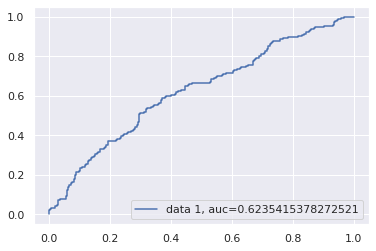

In [29]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [30]:
sns.set_context("talk")
sns.set_style("whitegrid", {'grid.color': '.92'})

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)

    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")

    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]

    return new_tick_format

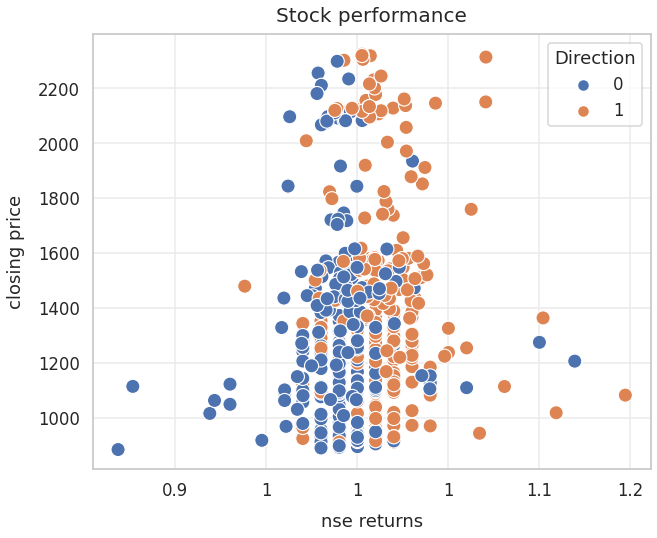

In [31]:
import matplotlib.ticker as tick
import matplotlib.patches as patches
plt.figure(figsize=(10, 8))
sns.scatterplot(x='nse_returns', y='nse_closing_price', hue='Direction', data=D_test, s=200)
plt.title("Stock performance", y=1.015, fontsize=20)
plt.xlabel("nse returns", labelpad=13)
plt.ylabel("closing price", labelpad=13)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

In [32]:
X_train_probability_class_1 = logmodel.predict_proba(X_train)[:, 1]

In [33]:
predictions = {"x_train_points": X_train['nse_returns'],
                 "x_train_probability_being_class_1": X_train_probability_class_1}
df_predictions = pd.DataFrame(predictions)

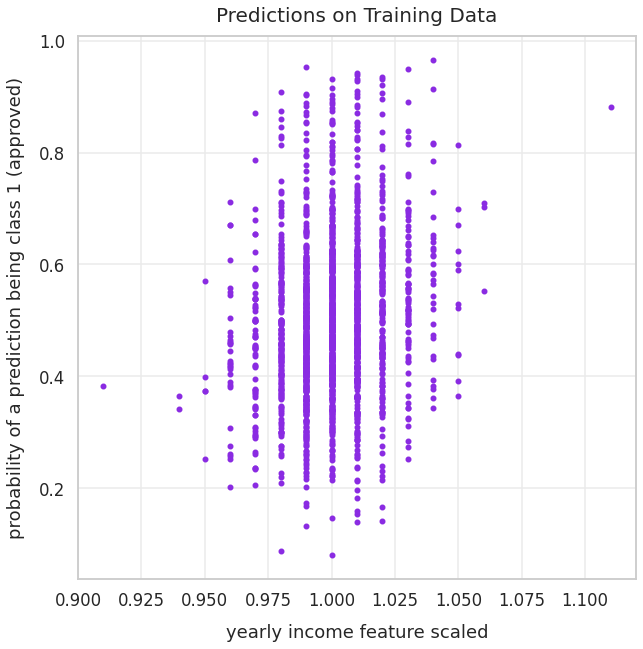

In [34]:
ax = df_predictions.plot.scatter(x="x_train_points", y="x_train_probability_being_class_1", figsize=(10, 10), c='blueviolet')
plt.title("Predictions on Training Data", y=1.015, fontsize=20)
plt.xlabel("yearly income feature scaled", labelpad=14)
plt.ylabel("probability of a prediction being class 1 (approved)", labelpad=14);

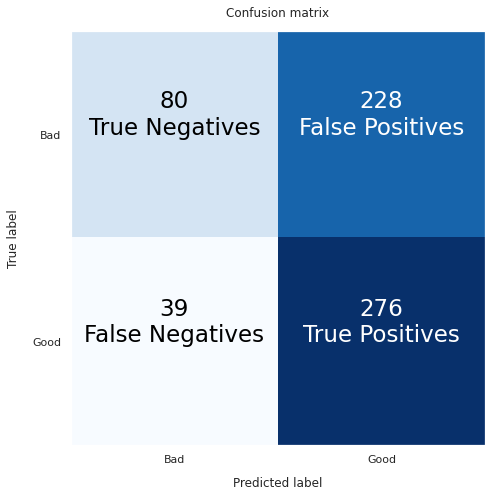

In [37]:
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    name = None    
    fmt = 'd'
    thresh = cm.max() / 2
    # i and j tell us the coordinates of boxes
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0 and j == 0:
            name = "True Negatives"
        elif i == 0 and j == 1:
            name = "False Positives"
        elif i == 1 and j == 1:
            name = "True Positives"
        else:
            name = "False Negatives"
        plt.text(j, i, format(cm[i, j], fmt) + "\n" + name, horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', labelpad=12)
    plt.xlabel('Predicted label', labelpad=12)
    plt.title(title, y=1.02)
    plt.tight_layout()

# Compute confusion matrix
y_test_c=y_test.to_numpy()
cnf_matrix = confusion_matrix(y_test_c, predictions); 
np.set_printoptions(precision=2);
class_names = ["Bad", "Good"]
# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

In [ ]:
predictions

In [38]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler() #adad ro beine sefr o yek mikone
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,14)
y_train = y_scaler.fit_transform(y_train)
X_train = x_scaler.fit_transform(X_train)

y_test = np.array(y_test).reshape(-1,1)
X_test = x_scaler.fit_transform(X_test)
y_test = y_scaler.fit_transform(y_test)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn import metrics

In [40]:
model = Sequential()
model.add(Dense(6, activation='relu'))
model.add(Dense(10, activation='relu'))
#model.add(Dense(10, activation='relu'))
#model.add(Dense(10, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear')) #"softmax"))

model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.01), metrics=['acc'])

In [41]:
history = model.fit(X_train,y_train,epochs=500,batch_size=32,validation_split=0.2,verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
Y_PREDICT = model.predict(X_test, batch_size=32)
print(score)

[0.3215849697589874, 0.5778490900993347]


In [42]:
Y_PREDICT = [1 if x > 0.5 else 0 for x in Y_PREDICT]
matrix = metrics.confusion_matrix(y_test, Y_PREDICT)
recall = matrix[0][0]/(matrix[0][0]+matrix[1][0])
precision = matrix[0][0]/(matrix[0][0]+matrix[0][1])
print('Test loss:', score[0])
print('Test total recall:', recall)
print('Test total precision:', precision)
print('Test total accuracy :', score[1])

Test loss: 0.3215849697589874
Test total recall: 0.5435203094777563
Test total precision: 0.9123376623376623
Test total accuracy : 0.5778490900993347


In [43]:
print(classification_report(y_test,Y_PREDICT))

              precision    recall  f1-score   support

         0.0       0.54      0.91      0.68       308
         1.0       0.75      0.25      0.38       315

    accuracy                           0.58       623
   macro avg       0.64      0.58      0.53       623
weighted avg       0.65      0.58      0.53       623

